<a href="https://colab.research.google.com/github/jcazti/ia-ml/blob/main/Exercicio2LMSaude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dimensão (linhas, colunas): 569, 32


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Estatísticas (média, mediana, desvio-padrão):


,radius_mean,texture_mean,area_mean
mean,14.127292,19.289649,654.889104
median,13.370000,18.840000,551.100000
std,3.524049,4.301036,351.914129



Quartis (Q1, Q2, Q3):


,radius_mean,texture_mean,area_mean
Q1,11.70,16.17,420.3
Q2,13.37,18.84,551.1
Q3,15.78,21.80,782.7



IQR:


,IQR
radius_mean,4.08
texture_mean,5.63
area_mean,362.40



Média de radius_mean por diagnóstico:


,radius_mean_mean
diagnosis,
B,12.146524
M,17.462830



Média de area_worst por diagnóstico:


,area_worst_mean
diagnosis,
B,558.899440
M,1422.286321



Frequências absolutas:


,n
diagnosis,
B,357
M,212



Frequências percentuais (%):


,%
diagnosis,
B,62.74
M,37.26



Tabela n/%:


,n,%
diagnosis,,
B,357,62.74
M,212,37.26


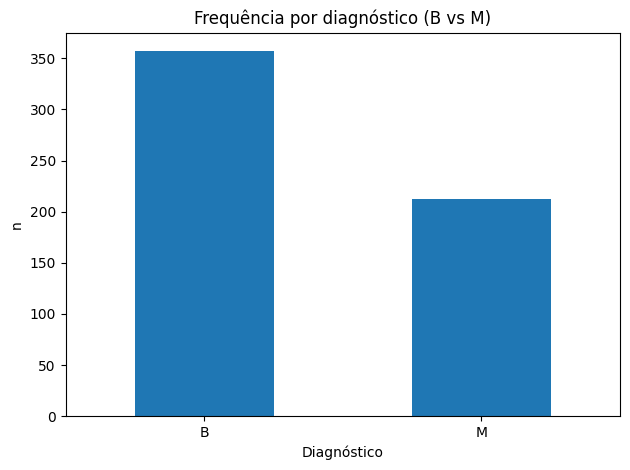


Correlação (radius_mean, perimeter_mean): 0.9979

Top-3 |corr| com diagnosis:


,|corr|
concave_points_worst,0.793566
perimeter_worst,0.782914
concave_points_mean,0.776614



Top-10 por radius_worst:


,diagnosis,radius_worst,area_worst
461,M,36.04,4254.0
352,M,33.13,3234.0
180,M,33.12,3216.0
265,M,32.49,3432.0
236,M,31.01,2944.0
503,M,30.79,2782.0
368,M,30.75,3143.0
339,M,30.67,2906.0
82,M,30.00,2562.0
521,M,29.92,2642.0


In [2]:
# Imports principais
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# 1) Carregamento e inspeção inicial
DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

feature_groups = ["mean", "se", "worst"]
base_features = [
    "radius", "texture", "perimeter", "area", "smoothness",
    "compactness", "concavity", "concave_points", "symmetry",
    "fractal_dimension"
]
feature_cols = [f"{b}_{g}" for g in feature_groups for b in base_features]
cols = ["id", "diagnosis"] + feature_cols  # total 32

df = pd.read_csv(DATA_URL, header=None, names=cols)

n_rows, n_cols = df.shape
print(f"Dimensão (linhas, colunas): {n_rows}, {n_cols}")
display(df.head())

# 2) Estatísticas descritivas básicas
variaveis = ["radius_mean", "texture_mean", "area_mean"]

estatisticas = df[variaveis].agg(["mean", "median", "std"])
print("\nEstatísticas (média, mediana, desvio-padrão):")
display(estatisticas)

quartis = df[variaveis].quantile([0.25, 0.5, 0.75]).rename(index={0.25: "Q1", 0.5: "Q2", 0.75: "Q3"})
iqr = quartis.loc["Q3"] - quartis.loc["Q1"]
print("\nQuartis (Q1, Q2, Q3):")
display(quartis)
print("\nIQR:")
display(iqr.to_frame(name="IQR"))

# 3) Análise por grupo
media_radius_por_diag = df.groupby("diagnosis")["radius_mean"].mean()
print("\nMédia de radius_mean por diagnóstico:")
display(media_radius_por_diag.to_frame(name="radius_mean_mean"))

media_area_worst_por_diag = df.groupby("diagnosis")["area_worst"].mean()
print("\nMédia de area_worst por diagnóstico:")
display(media_area_worst_por_diag.to_frame(name="area_worst_mean"))

# 4) Distribuições e frequências
freq_abs = df["diagnosis"].value_counts()
freq_pct = (df["diagnosis"].value_counts(normalize=True) * 100).round(2)

print("\nFrequências absolutas:")
display(freq_abs.to_frame(name="n"))
print("\nFrequências percentuais (%):")
display(freq_pct.to_frame(name="%"))

tabela_freq = pd.DataFrame({"n": freq_abs, "%": freq_pct})
print("\nTabela n/%:")
display(tabela_freq)

# 4c) Gráfico de barras das frequências
ax = freq_abs.plot(kind="bar")
ax.set_title("Frequência por diagnóstico (B vs M)")
ax.set_xlabel("Diagnóstico")
ax.set_ylabel("n")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 5) Correlação e filtros
# 5a) Correlação radius_mean x perimeter_mean
corr_rp = df["radius_mean"].corr(df["perimeter_mean"])
print(f"\nCorrelação (radius_mean, perimeter_mean): {corr_rp:.4f}")

# 5b) Top-3 variáveis mais correlacionadas (|corr|) com diagnosis (B=0, M=1)
df_corr = df.copy()
df_corr["diagnosis_bin"] = df_corr["diagnosis"].map({"B": 0, "M": 1})

num_cols = df_corr.select_dtypes(include="number").columns.tolist()
# Remover colunas que não são atributos de medida
for drop_col in ["id", "diagnosis_bin"]:
    if drop_col in num_cols:
        num_cols.remove(drop_col)

corrs = df_corr[num_cols].corrwith(df_corr["diagnosis_bin"]).abs().sort_values(ascending=False)
print("\nTop-3 |corr| com diagnosis:")
display(corrs.head(3).to_frame(name="|corr|"))

# 5c) 10 casos com maior radius_worst (mostrar colunas pedidas)
top10 = df.nlargest(10, "radius_worst")[["diagnosis", "radius_worst", "area_worst"]]
print("\nTop-10 por radius_worst:")
display(top10)